In [1]:
import sys
import datetime
import pandas as pd

path_root = '../../..'
sys.path.append(f'{path_root}/')
from src.util.functions import Functions
from src.visualize.visualizer import BarPlot
# Disable warning
pd.options.mode.chained_assignment = None 

level = 'regioni'
region_name = "abruzzo"

path_data = f'{path_root}/data'
path_img_root =  f'{path_data}/imgs/grafici/{level}/{region_name}'
path_csv = f'{path_data}/csv'
csv_in_name = f'{path_csv}/{level}/covid19-{region_name}.csv'

In [2]:
df_raw = pd.read_csv(csv_in_name)
df_raw

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-02-25T18:00:00,13,Abruzzo,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
1,2020-02-26T18:00:00,13,Abruzzo,0,0,0,0,0,0,0,...,0.0,8.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
2,2020-02-27T18:00:00,13,Abruzzo,1,0,1,0,1,1,1,...,0.0,20.0,0.0,0.0,0.00,100.00,5.00,0.00,0.00,0.00
3,2020-02-28T18:00:00,13,Abruzzo,1,0,1,0,1,0,0,...,0.0,0.0,0.0,0.0,0.00,100.00,0.00,0.00,0.00,0.00
4,2020-02-29T17:00:00,13,Abruzzo,2,0,2,0,2,1,1,...,0.0,10.0,0.0,0.0,0.00,100.00,10.00,0.00,0.00,100.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,2021-03-16T17:00:00,13,Abruzzo,675,87,762,11610,12372,-434,212,...,13.0,6329.0,1853.0,-424.0,11.42,6.16,3.35,11.44,0.00,-3.39
386,2021-03-17T17:00:00,13,Abruzzo,667,89,756,10922,11678,-694,304,...,10.0,8476.0,2026.0,-688.0,11.77,6.47,3.59,15.00,2.30,-5.61
387,2021-03-18T17:00:00,13,Abruzzo,667,89,756,10346,11102,-576,462,...,9.0,10070.0,2761.0,-576.0,11.77,6.81,4.59,16.73,0.00,-4.93
388,2021-03-19T17:00:00,13,Abruzzo,672,88,760,10203,10963,-139,417,...,29.0,6557.0,1916.0,-143.0,11.58,6.93,6.36,21.76,-1.12,-1.25


In [3]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2021, 3, 20, 17, 0)

In [4]:
# Print stats
# df_n[-2:].iloc[:, 1:]
df_last = df_raw[-1:]
print('Nuovi positivi:', df_last['nuovi_positivi'].item())
print('Nuovi tamponi:', df_last['nuovi_tamponi'].item())
print('Percentuale nuovi positivi/nuovi tamponi:', round(df_last['nuovi_positivi'].item()/df_last['nuovi_tamponi'].item(), 2) * 100, '%')
print('Nuovi guariti:', df_last['nuovi_dimessi_guariti'].item())
print('Nuovi deceduti:', df_last['nuovi_deceduti'].item())
print('Variazione positivi ricoverati con sintomi:', df_last['variazione_ricoverati_con_sintomi'].item())
print('Variazione positivi in terapia intensiva:', df_last['variazione_terapia_intensiva'].item())
print('Variazione positivi in isolamento dimiciliare:', df_last['variazione_isolamento_domiciliare'].item())

Nuovi positivi: 370
Nuovi tamponi: 6318.0
Percentuale nuovi positivi/nuovi tamponi: 6.0 %
Nuovi guariti: 424.0
Nuovi deceduti: 35.0
Variazione positivi ricoverati con sintomi: -4.0
Variazione positivi in terapia intensiva: -5.0
Variazione positivi in isolamento dimiciliare: -81.0


In [5]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2021, 3, 20, 17, 0)

In [6]:
# TODO: define function
days = 60
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-01-19T17:00:00,13,Abruzzo,443,44,487,10559,11046,-336,113,...,9.0,4048.0,1747.0,-326.0,9.03,4.41,2.79,6.47,2.33,-2.95
1,2021-01-20T17:00:00,13,Abruzzo,443,45,488,10499,10987,-59,279,...,7.0,11488.0,6354.0,-60.0,9.22,4.44,2.43,4.39,2.27,-0.53
2,2021-01-21T17:00:00,13,Abruzzo,442,43,485,10175,10660,-327,212,...,9.0,10793.0,6545.0,-324.0,8.87,4.55,1.96,3.24,-4.44,-2.98
3,2021-01-22T17:00:00,13,Abruzzo,441,40,481,10018,10499,-161,318,...,17.0,9312.0,5275.0,-157.0,8.32,4.58,3.41,6.03,-6.98,-1.51
4,2021-01-23T17:00:00,13,Abruzzo,427,41,468,9943,10411,-88,221,...,10.0,9274.0,5339.0,-75.0,8.76,4.50,2.38,4.14,2.50,-0.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2021-03-16T17:00:00,13,Abruzzo,675,87,762,11610,12372,-434,212,...,13.0,6329.0,1853.0,-424.0,11.42,6.16,3.35,11.44,0.00,-3.39
57,2021-03-17T17:00:00,13,Abruzzo,667,89,756,10922,11678,-694,304,...,10.0,8476.0,2026.0,-688.0,11.77,6.47,3.59,15.00,2.30,-5.61
58,2021-03-18T17:00:00,13,Abruzzo,667,89,756,10346,11102,-576,462,...,9.0,10070.0,2761.0,-576.0,11.77,6.81,4.59,16.73,0.00,-4.93
59,2021-03-19T17:00:00,13,Abruzzo,672,88,760,10203,10963,-139,417,...,29.0,6557.0,1916.0,-143.0,11.58,6.93,6.36,21.76,-1.12,-1.25


In [7]:
# Define figures properties
graph_prop = {'path_root': path_img,
              'label_font': 14,
              'data': {'label': 'Data', 'ticks': lambda x: x.split('T')[0]},
              'nuovi_positivi': {'label': 'Nuovi positivi', 'file_name': 'nuovi_positivi'},
              'np_su_nt': {'label': 'Nuovi positivi / Nuovi tamponi (%)', 'file_name': 'nuovi_positivi_su_nuovi_tamponi'},
              'np_su_nct': {'label': 'Nuovi positivi / Nuovi casi testati (%)', 'file_name': 'nuovi_positivi_su_nuovi_casi_testati'},
              'totale_positivi': {'label': 'Totale positivi', 'file_name': 'totale_positivi'},
              'var_pos_perc': {'label': 'Variazione totale positivi (%)', 'file_name': 'variazione_totale_positivi_perc'},
              'terapia_intensiva': {'label': 'Terapia intensiva', 'file_name': 'terapia_intensiva'},
              'var_ti_perc': {'label': 'Variazione terapia intensiva (%)', 'file_name': 'variazione_terapia_intensiva_perc'},
              'ti_su_to': {'label': 'Terapia intensiva / Totale ospedalizzati (%)', 'file_name': 'terapia_intensiva_su_totale_ospedalizzati'},
              'saturazione_terapia_intensiva': {'label': 'Saturazione terapia intensiva (%)', 'file_name': 'saturazione_terapia_intensiva'},
              'totale_ospedalizzati': {'label': 'Totale ospedalizzati', 'file_name': 'totale_ospedalizzati'},
              'to_su_tp': {'label': 'Totale ospedalizzati / Totale positivi (%)', 'file_name': 'totale_ospedalizzati_su_totale_positivi'},
              'nuovi_deceduti': {'label': 'Nuovi deceduti', 'file_name': 'nuovi_deceduti'},
              'nuovi_dimessi_guariti': {'label': 'Nuovi dimessi guariti', 'file_name': 'nuovi_dimessi_guariti'}}

# Create BarPlot object
bp = BarPlot(df, 'data', graph_prop)

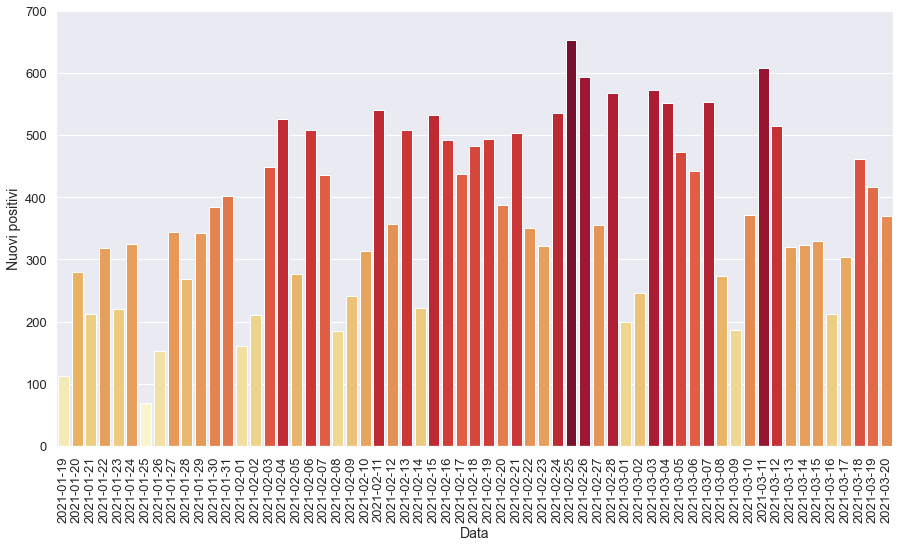

In [8]:
# New positives on new swabs in the last 60 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

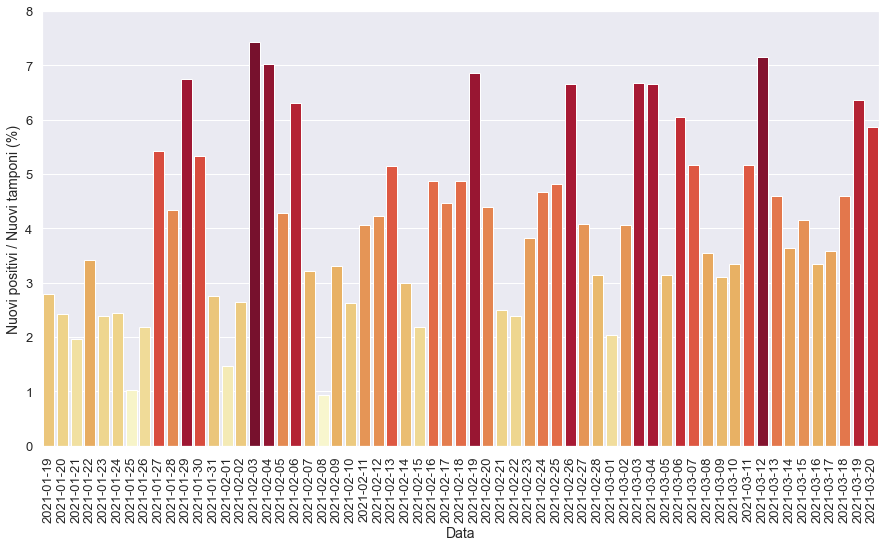

In [9]:
# New positives on new swabs in the last 60 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

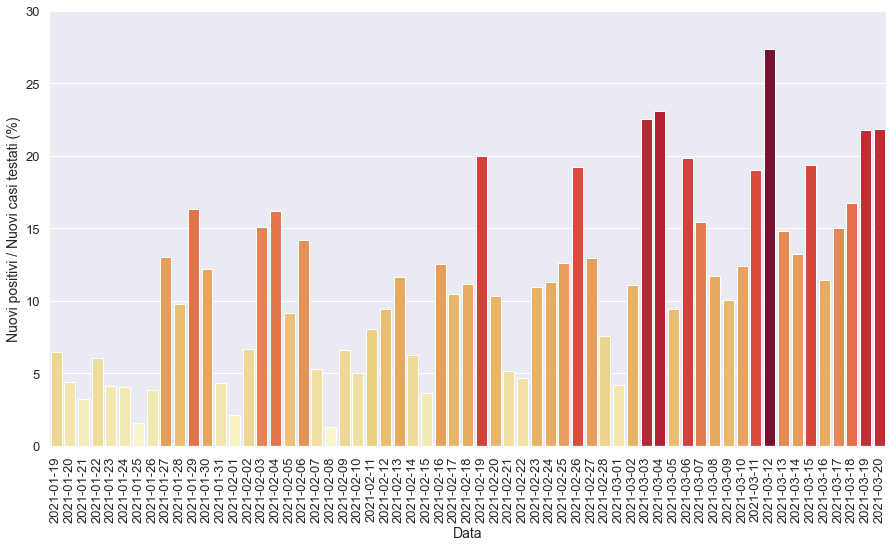

In [10]:
# New positives on new tested cases in the last 60 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

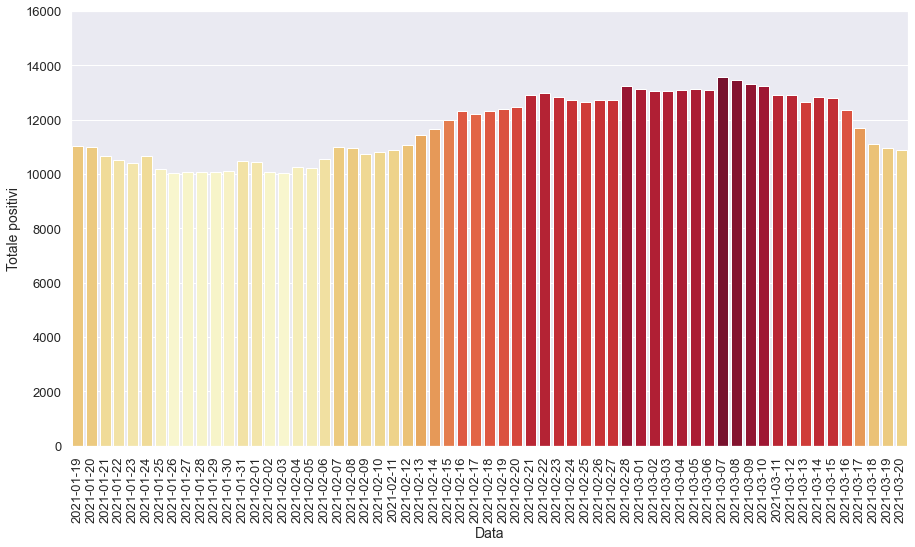

In [11]:
# Percentage of variation of positives in the last 60 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

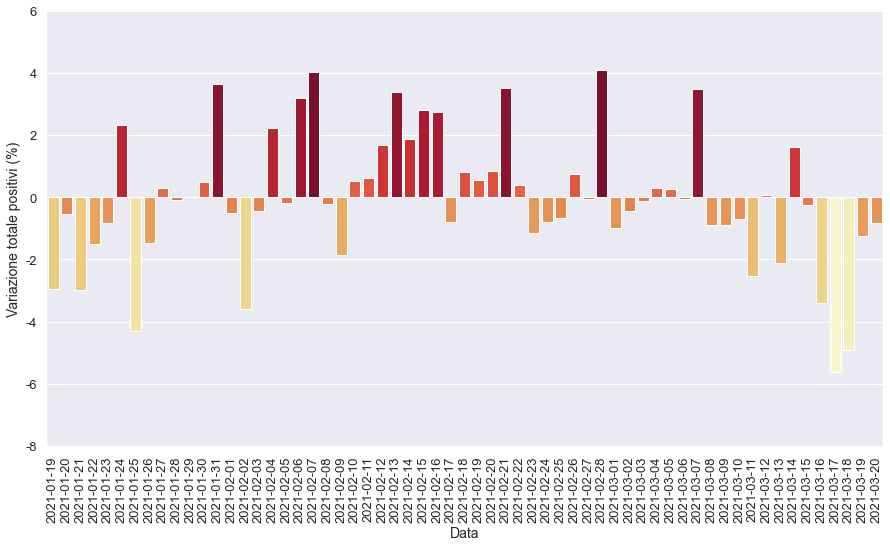

In [12]:
# Percentage of variation of total positives in the last 60 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

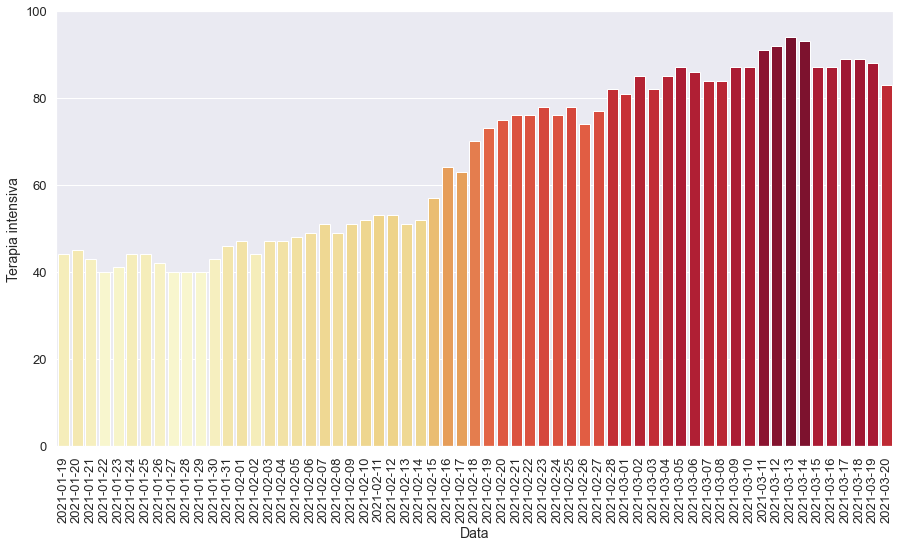

In [13]:
# Positives in ICU in the last 60 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

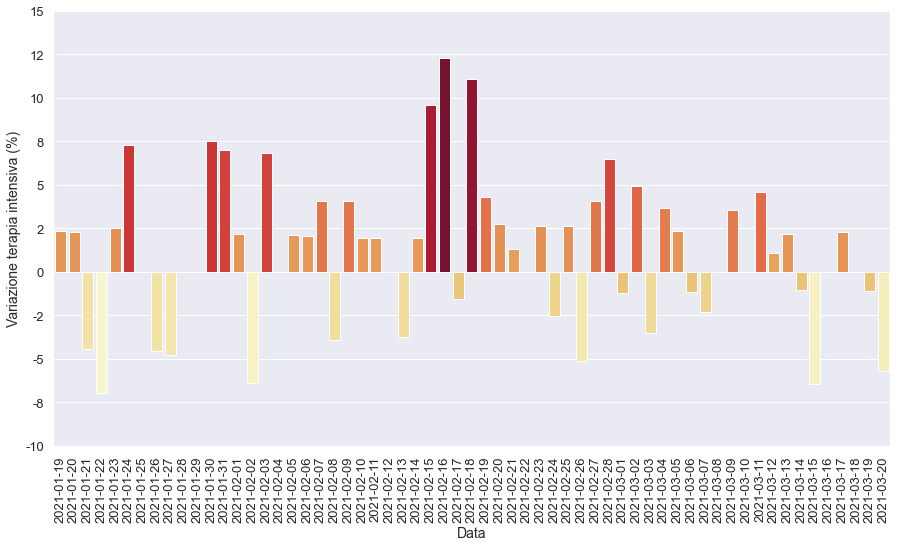

In [14]:
# Percentage of variation of positives in ICU in the last 60 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

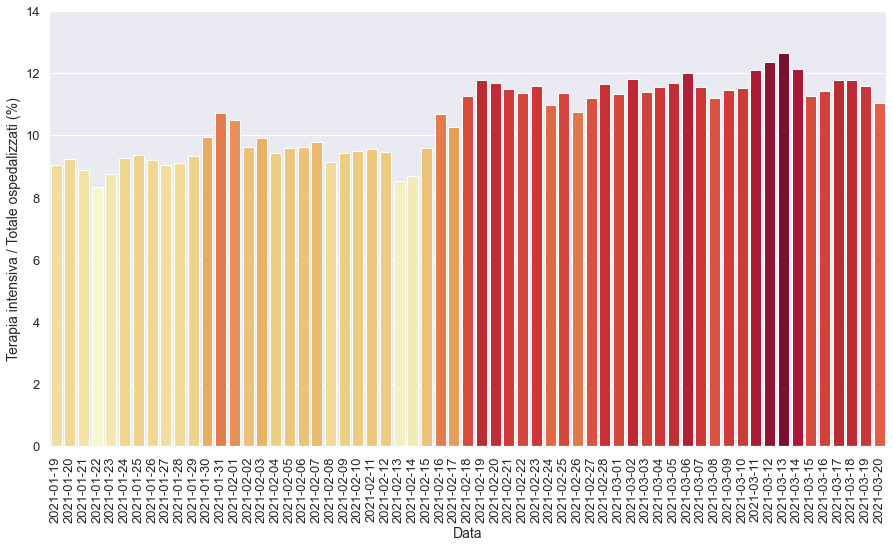

In [15]:
# Positives in ICU in the last 60 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

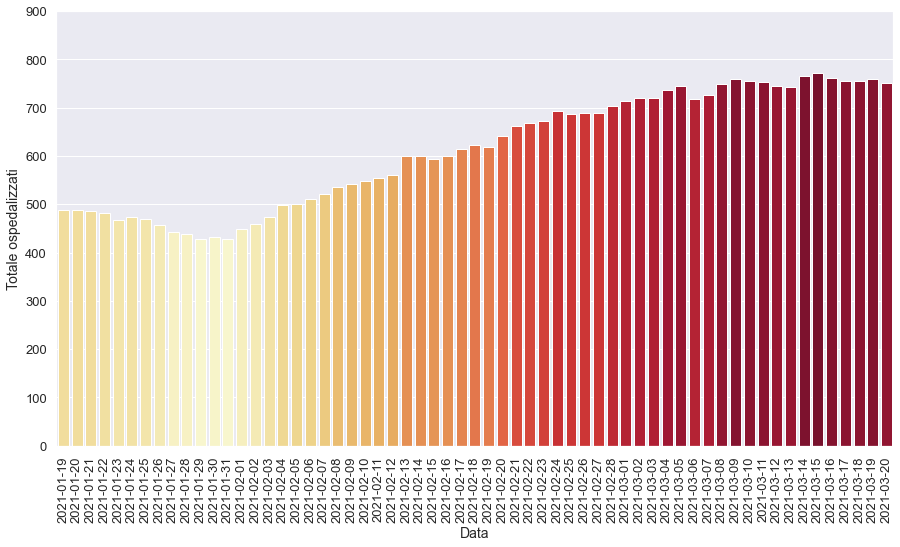

In [16]:
# Hospitalized positives in the last 60 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

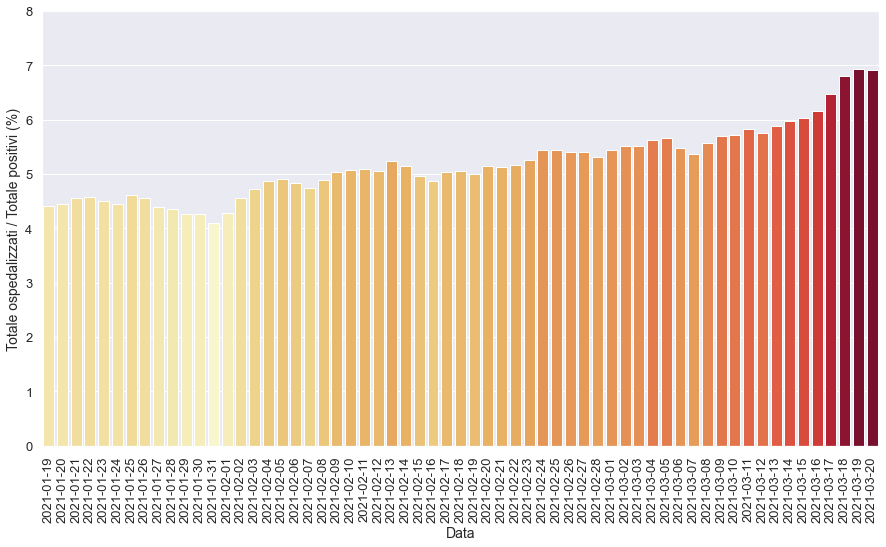

In [17]:
# Hospitalized positives in the last 60 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

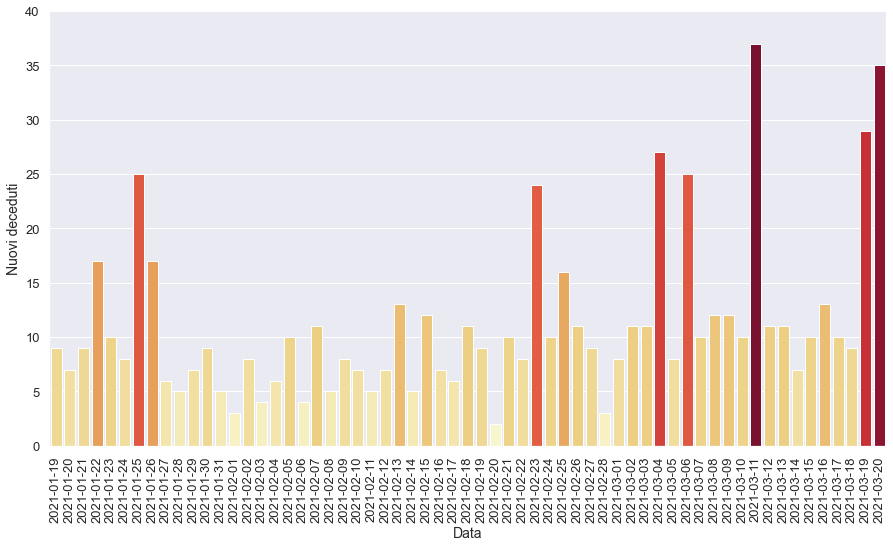

In [18]:
# New deads in the last 60 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

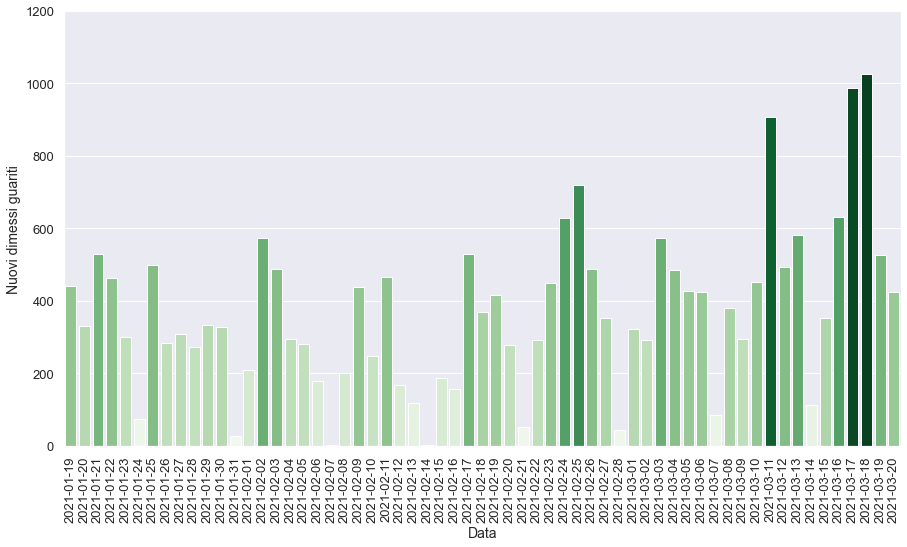

In [19]:
# New healed in the last 60 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [20]:
# TODO: define function
days = 30
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-02-18T17:00:00,13,Abruzzo,552,70,622,11686,12308,101,482,...,11.0,9894.0,4309.0,93.0,11.25,5.05,4.87,11.19,11.11,0.83
1,2021-02-19T17:00:00,13,Abruzzo,546,73,619,11758,12377,69,494,...,9.0,7209.0,2470.0,72.0,11.79,5.00,6.85,20.00,4.29,0.56
2,2021-02-20T17:00:00,13,Abruzzo,567,75,642,11841,12483,106,387,...,2.0,8808.0,3748.0,83.0,11.68,5.14,4.39,10.33,2.74,0.86
3,2021-02-21T17:00:00,13,Abruzzo,586,76,662,12262,12924,441,503,...,10.0,20097.0,9763.0,421.0,11.48,5.12,2.50,5.15,1.33,3.53
4,2021-02-22T17:00:00,13,Abruzzo,593,76,669,12304,12973,49,351,...,8.0,14768.0,7474.0,42.0,11.36,5.16,2.38,4.70,0.00,0.38
5,2021-02-23T17:00:00,13,Abruzzo,595,78,673,12150,12823,-150,322,...,24.0,8420.0,2939.0,-154.0,11.59,5.25,3.82,10.96,2.63,-1.16
6,2021-02-24T17:00:00,13,Abruzzo,617,76,693,12027,12720,-103,535,...,10.0,11473.0,4720.0,-123.0,10.97,5.45,4.66,11.33,-2.56,-0.80
7,2021-02-25T17:00:00,13,Abruzzo,609,78,687,11948,12635,-85,653,...,16.0,13566.0,5178.0,-79.0,11.35,5.44,4.81,12.61,2.63,-0.67
8,2021-02-26T17:00:00,13,Abruzzo,614,74,688,12043,12731,96,594,...,11.0,8929.0,3087.0,95.0,10.76,5.40,6.65,19.24,-5.13,0.76
9,2021-02-27T17:00:00,13,Abruzzo,611,77,688,12035,12723,-8,355,...,9.0,8710.0,2738.0,-8.0,11.19,5.41,4.08,12.97,4.05,-0.06


In [21]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

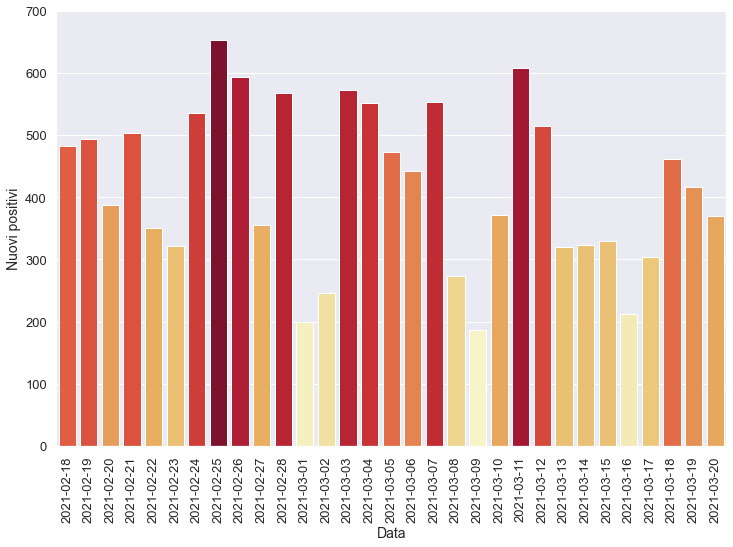

In [22]:
# New positives on new swabs in the last 30 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

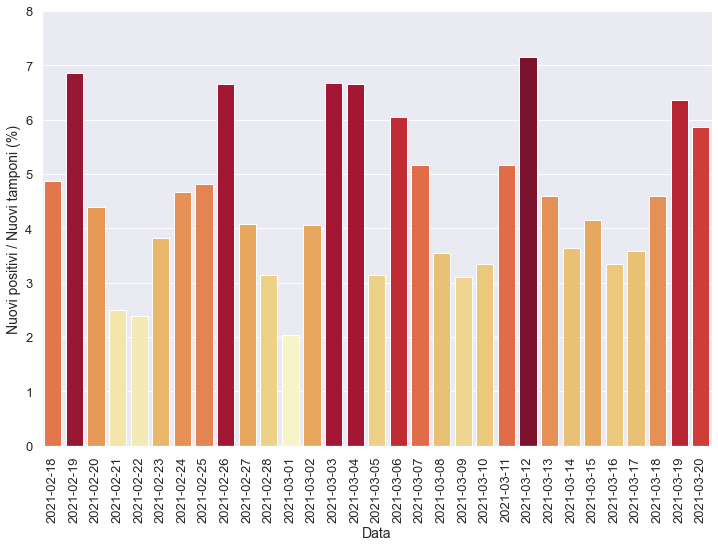

In [23]:
# New positives on new swabs in the last 30 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

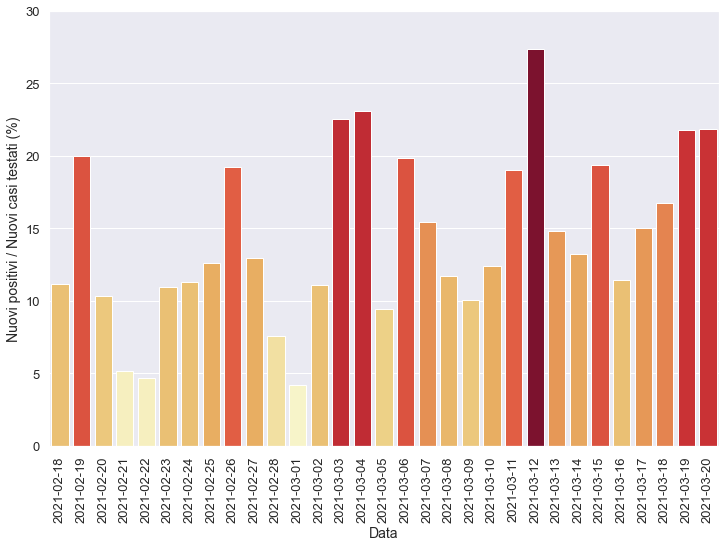

In [24]:
# New positives on new tested cases in the last 30 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

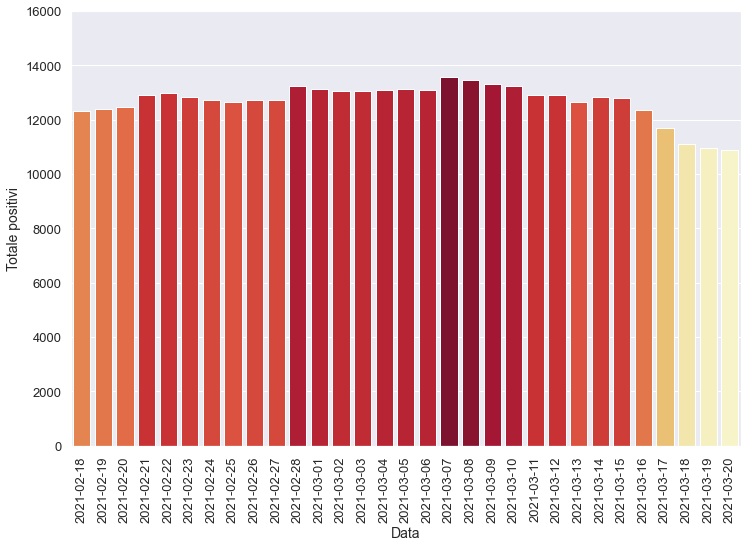

In [25]:
# Number of positives in the last 30 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

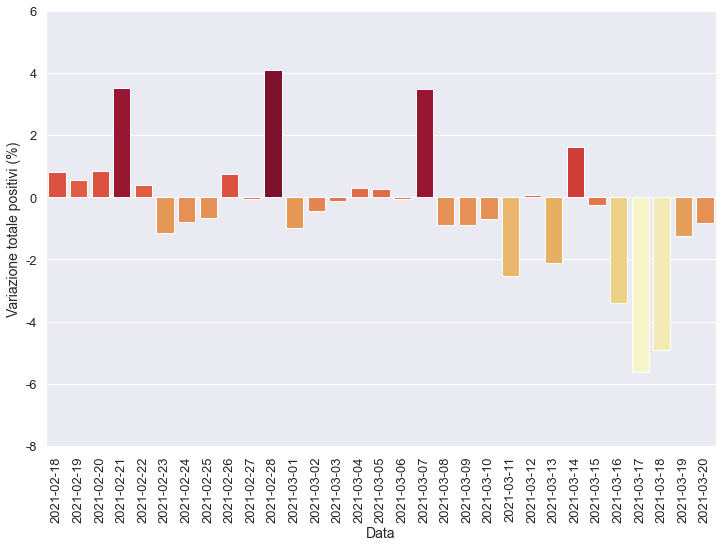

In [26]:
# Percentage of variation of positives in the last 30 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

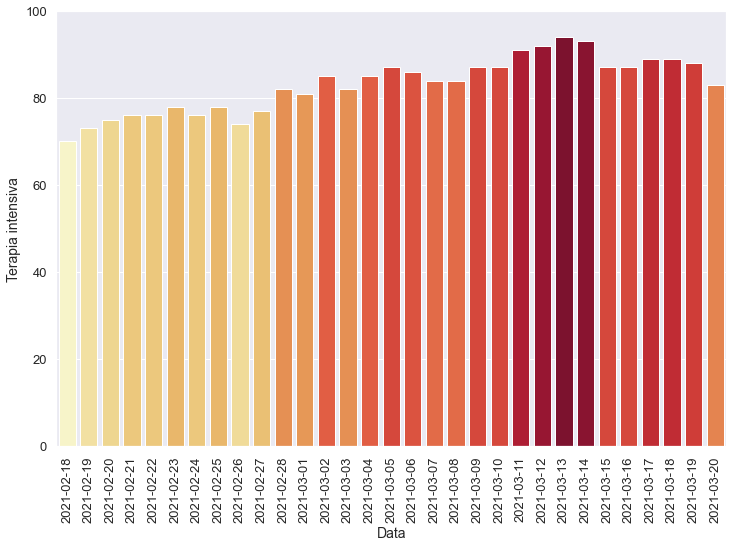

In [27]:
# Positives in ICU in the last 30 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

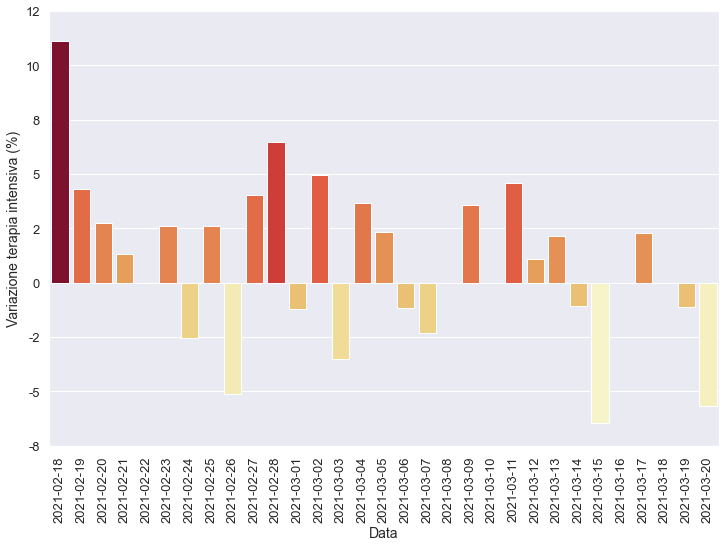

In [28]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

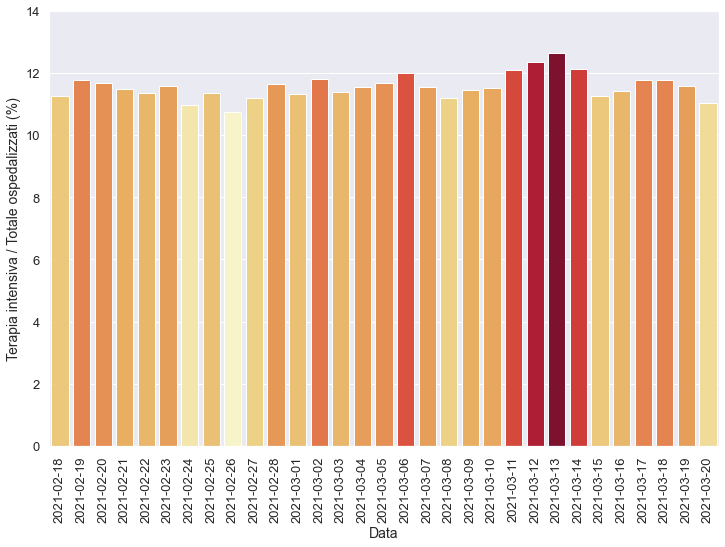

In [29]:
# TODO
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

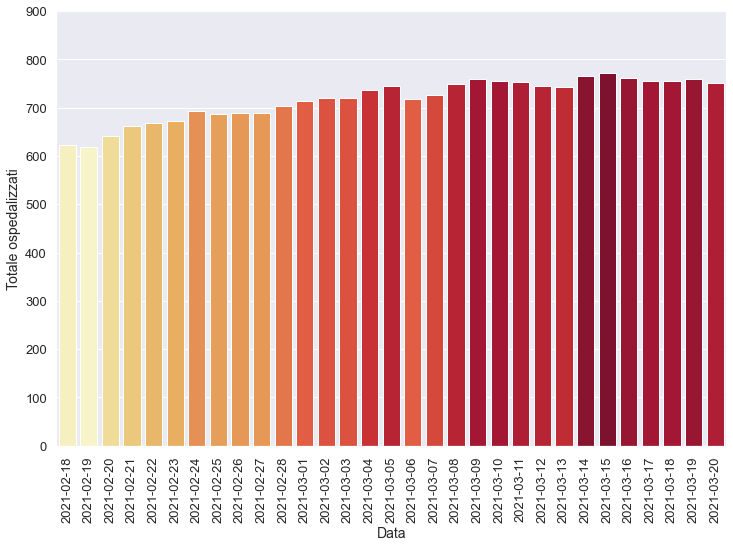

In [30]:
# Hospitalized positives in the last 30 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

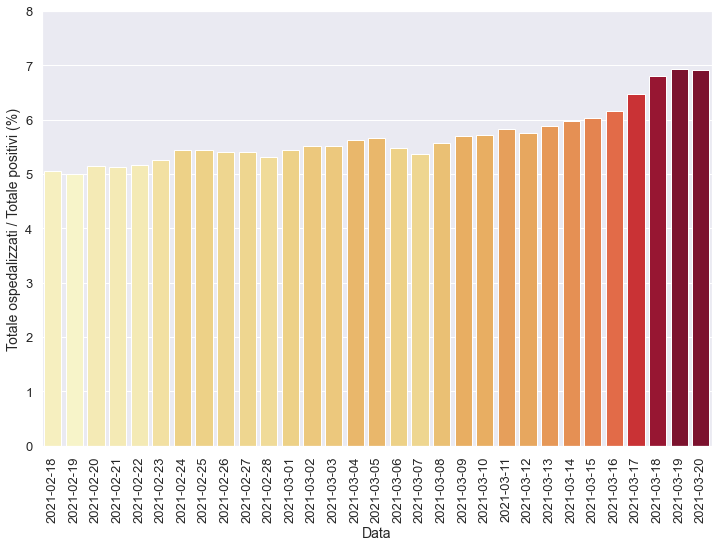

In [31]:
# Hospitalized positives in the last 30 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

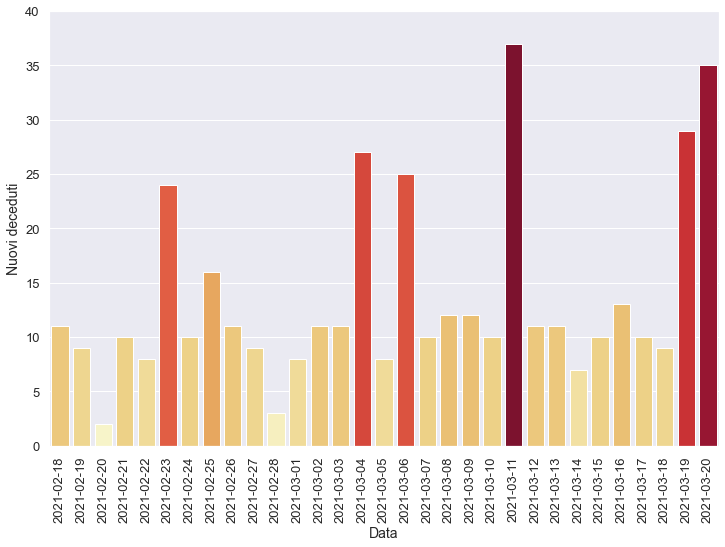

In [32]:
# New deads in the last 30 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

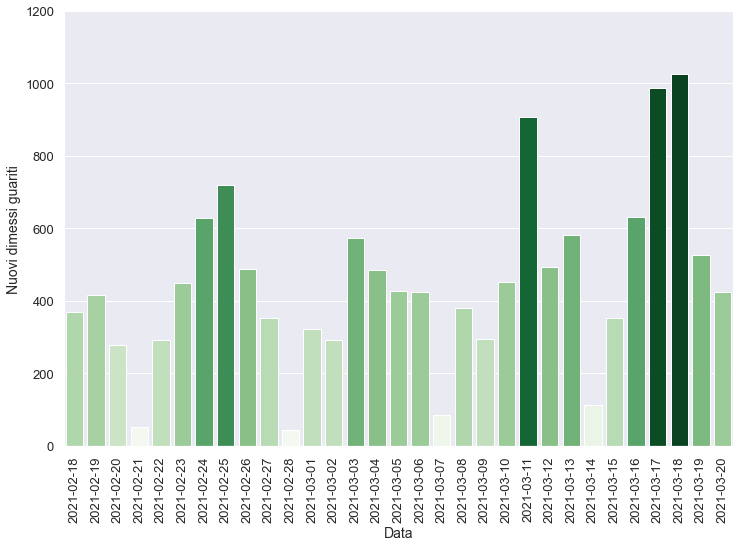

In [33]:
# New healed in the last 30 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [34]:
# TODO: define function
days = 7
path_img = '{path_img_root}/0{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-03-13T17:00:00,13,Abruzzo,649,94,743,11893,12636,-274,320,...,11.0,6979.0,2159.0,-273.0,12.65,5.88,4.59,14.82,2.17,-2.12
1,2021-03-14T17:00:00,13,Abruzzo,673,93,766,12074,12840,204,323,...,7.0,8878.0,2439.0,181.0,12.14,5.97,3.64,13.24,-1.06,1.61
2,2021-03-15T17:00:00,13,Abruzzo,685,87,772,12034,12806,-34,329,...,10.0,7922.0,1698.0,-40.0,11.27,6.03,4.15,19.38,-6.45,-0.26
3,2021-03-16T17:00:00,13,Abruzzo,675,87,762,11610,12372,-434,212,...,13.0,6329.0,1853.0,-424.0,11.42,6.16,3.35,11.44,0.00,-3.39
4,2021-03-17T17:00:00,13,Abruzzo,667,89,756,10922,11678,-694,304,...,10.0,8476.0,2026.0,-688.0,11.77,6.47,3.59,15.00,2.30,-5.61
5,2021-03-18T17:00:00,13,Abruzzo,667,89,756,10346,11102,-576,462,...,9.0,10070.0,2761.0,-576.0,11.77,6.81,4.59,16.73,0.00,-4.93
6,2021-03-19T17:00:00,13,Abruzzo,672,88,760,10203,10963,-139,417,...,29.0,6557.0,1916.0,-143.0,11.58,6.93,6.36,21.76,-1.12,-1.25
7,2021-03-20T17:00:00,13,Abruzzo,668,83,751,10122,10873,-90,370,...,35.0,6318.0,1692.0,-81.0,11.05,6.91,5.86,21.87,-5.68,-0.82


In [35]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

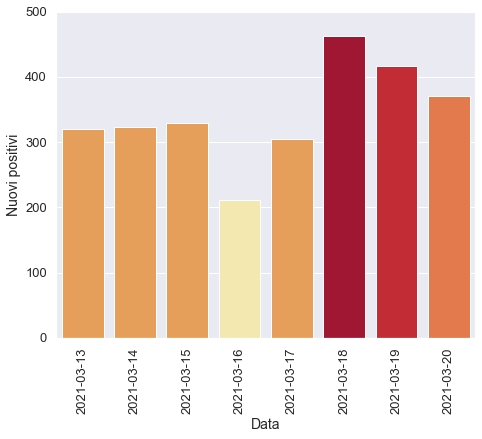

In [36]:
# New positives on new swabs in the last 7 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

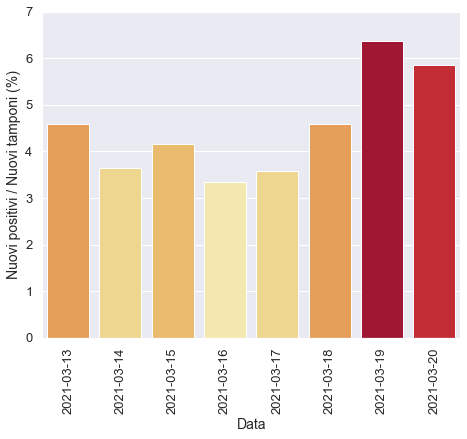

In [37]:
# New positives on new swabs in the last 7 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

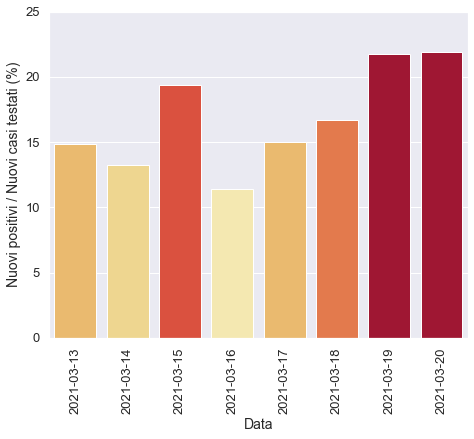

In [38]:
# New positives on new tested cases in the last 7 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

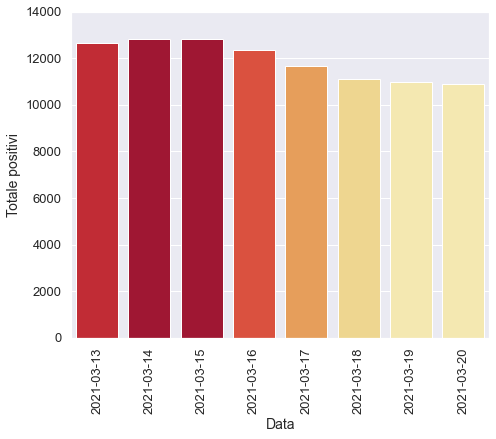

In [39]:
# Percentage of variation of positives in the last 7 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

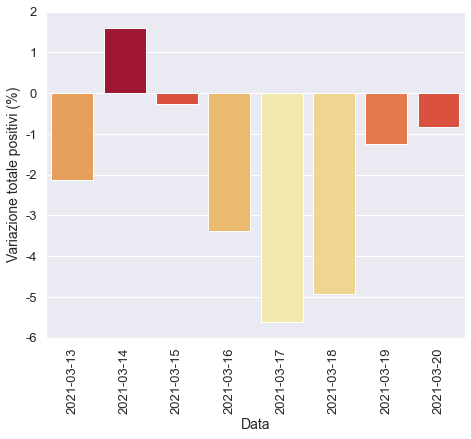

In [40]:
# Percentage of variation of positives in the last 7 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

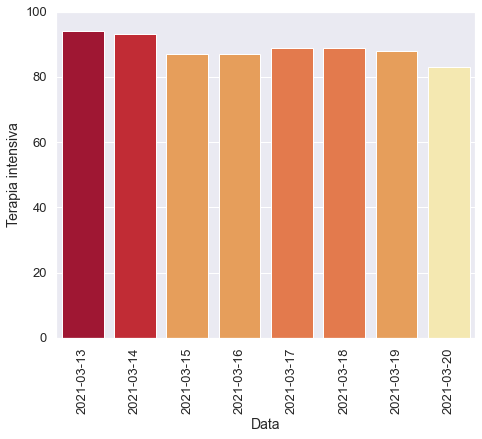

In [41]:
# Positives in ICU in the last 7 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

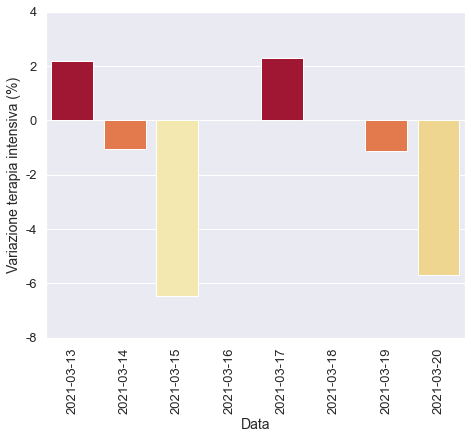

In [42]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

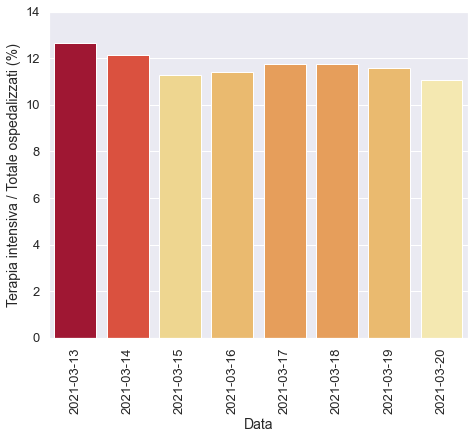

In [43]:
# Positives in ICU in the last 7 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

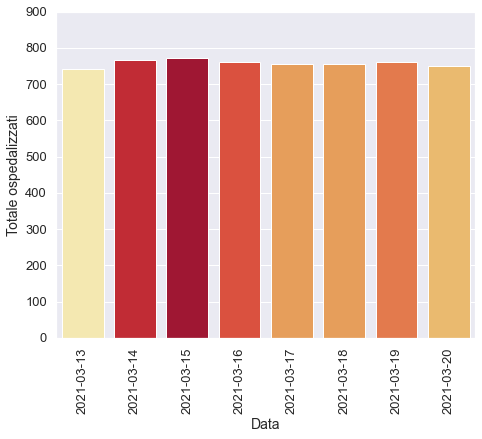

In [44]:
# Hospitalized positives in the last 7 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

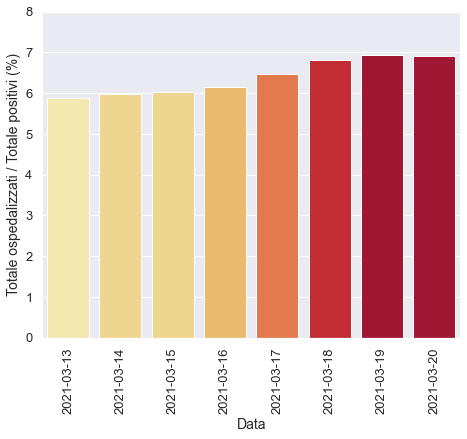

In [45]:
# Hospitalized positives in the last 7 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

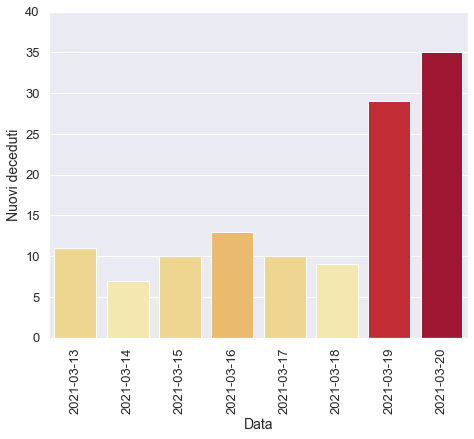

In [46]:
# New deads in the last 7 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

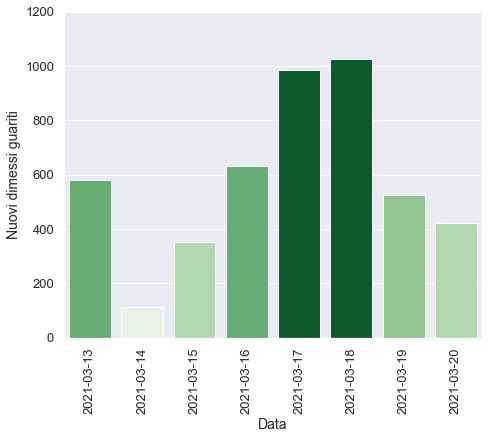

In [47]:
# New healed in the last 7 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)